# Ronchi grating frames analysis of ADC effects

In [659]:
import matplotlib.pyplot as plt  
import pandas as pd  
import os
import numpy as np
from astropy.io import fits 

from PIL import Image


#conda install -c astropy photutils

from photutils import centroid_com, centroid_1dg, centroid_2dg

#need to install newer version of scipy from conda, need 1.2 or newer for find_peaks function

from scipy.signal import find_peaks

#for animations
from matplotlib import animation, rc
from IPython.display import HTML

#patches
from matplotlib import patches as patches


from astropy.modeling import models, fitting

#from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

from astropy.modeling.models import custom_model

from scipy.optimize import curve_fit

import yaml
import csv
import datetime

In [660]:
#@custom_model
def gauss_offset(x, amplitude=1., mean=0., stddev=1., H=0.):
    
    return H + amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))

def gauss_fit(H,x, y):
    mean = sum(x * y) / sum(y)
    stddev = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss_offset, x, y, p0=[H,max(y), mean, stddev])
    return popt

In [665]:
event_timestamp_list = [
    '20200114.061041'
#    '20200114.061137'
#    '20200114.061204'
#    '20200114.061305'
#    '20200114.061331' #done
#    '20200114.061424'
#    '20200114.061521'
#    '20200114.061630'
#    '20200114.061757'
#    '20200114.061905'
#    '20200114.061937'
#    '20200114.062150'
#    '20200114.062432'
#    '20200114.062528'
#    '20200114.062730'
#    '20200114.062834'
#    '20200114.062834'
#    '20200114.064427'
#    '20200114.064522'
#    '20200114.064605'
#    '20200114.064650'
#    '20200114.064901'
#    '20200114.065609'
#    '20200114.070555'
#    '20200114.070627'
#    '20200114.070728'
#    '20200114.070815'
#    '20200114.070918'
#    '20200114.070950'
#    '20200114.071100'
#    '20200114.071216'
#    '20200114.071500'
#    '20200114.071716'
#    '20200114.071902'
#    '20200114.072050'
#    '20200114.072233'
#    '20200114.072416'
#    '20200114.072529'
#    '20200114.072609'
#    '20200114.072722'
#    '20200114.072837'
#    '20200114.072947'
#    '20200114.073119'
#    '20200114.073545'
#    '20200114.073822'
#    '20200114.074017'
#    '20200114.074317'
#    '20200114.074519'
#    '20200114.074642'
#    '20200114.074713'
#    '20200114.074845'
#    '20200114.075114'
#    '20200114.075225'
#    '20200114.075325'
#    '20200114.075432'
#    '20200114.075621'
#    '20200114.075731'
#    '20200114.080222'
#    '20200114.080345'
#    '20200114.080540'
#    '20200114.080617'
#    '20200114.080715'
#    '20200114.080750'
#    '20200114.080829'
#    '20200114.080923'
]

In [666]:
event_timestamp=event_timestamp_list[0]
print(event_timestamp)

20200114.061041


In [667]:
len(event_timestamp_list)

1

In [668]:
with open('params/raunche.yaml', 'r') as f:
    raunche_df = pd.io.json.json_normalize(yaml.load(f, Loader=yaml.FullLoader))

In [669]:
raunche_df.set_index('timestamp',inplace=True,drop=False)

In [670]:
raunche_params = []

In [671]:
if event_timestamp in raunche_df.index:
    raunche_params = raunche_df.loc[event_timestamp]
else:
    raunche_params = raunche_df.loc['default']

In [672]:
raunche_params = raunche_df.loc[event_timestamp]

In [673]:
raunche_params

airmass                                    1.25
bigbox                                      250
goffset_hwing1                                0
goffset_hwing2                                0
goffset_stellar_centroidx                     0
goffset_stellar_centroidy                     0
goffset_vwing1                                0
goffset_vwing2                                0
h1r                                   (50, 100)
h2r                                  (250, 300)
hafbox                                       40
pixcount_cutoff                             650
polynom_h1                                    1
polynom_h2                                    1
polynom_v1                                    1
polynom_v2                                    1
target_name                  lam Tau - HD 25204
timestamp                       20200114.061041
v1r                                   (50, 100)
v2r                                  (250, 300)
Name: 20200114.061041, dtype: object

## import our fits file

In [674]:
#filename="gf-cam.20191113.210243"
#filename="gf-cam.20191217.083513"
#filename="gf-cam.20191106.205946"
#filename="gf-cam.20200114.061041"
#filename="gf-cam.20200114.061137"
#filename="gf-cam.20200114.061204"
#filename="gf-cam.20200114.061305"
#filename="gf-cam.20200114.061331"
filename="gf-cam." + raunche_params['timestamp']

path = "c:/cloudstor/codestore/jupyter/adc-proc/ADC_test_14Jan2020/"

#infocus
#im = fits.open("19sep30176-9-stack-darksub.fits")
#im = fits.open("gf-cam.20191217.083513.fits")
im = fits.open(path + filename + ".fits")
imarray0=im[0].data

### peek at the image array

In [675]:
print(imarray0)

[[455 474 520 ... 525 526 445]
 [438 440 471 ... 475 449 482]
 [503 455 439 ... 488 507 521]
 ...
 [463 483 414 ... 477 490 488]
 [464 469 465 ... 436 441 476]
 [462 445 410 ... 467 444 488]]


### preview the image

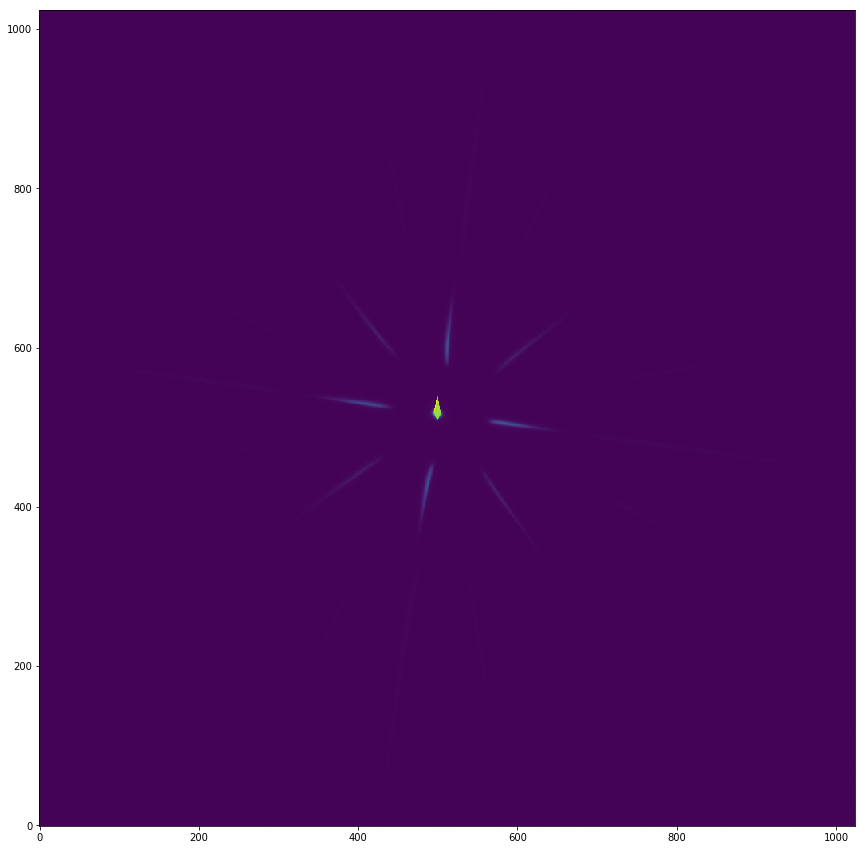

In [676]:
fig,ax = plt.subplots()

fig.set_size_inches(20, 15)
#ax.imshow(imarray,origin='lower')
ax.imshow(imarray0,origin='lower')

#rect=plt.Rectangle((0, 0), 1, 1, color='r')
# Create a Rectangle patch
#rect = patches.Rectangle(xorigin,xwidth,yheight,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
#ax.add_patch(rect)

### Centroid the whole image
doing a 1D bin then getting the max seems to find the centroid most accurately

In [677]:
cx, cy = centroid_com(imarray0)
print((cx,cy ))   

#if it fails, use max method
csumx=imarray0.sum(axis=0)
csumy=imarray0.sum(axis=1)

cx=(np.argmax(csumx))
cy=(np.argmax(csumy))
print(cx,cy)

(515.2293725561174, 509.6007089007192)
499 529


In [678]:
hafbox=40

bigbox=250

imarray=imarray0[int(cy)-bigbox:int(cy)+bigbox,int(cx)-bigbox:int(cx)+bigbox]

cx, cy = centroid_com(imarray)

stellarbox=imarray[int(cy)-hafbox:int(cy)+hafbox,int(cx)-hafbox:int(cx)+hafbox]
#stellarbox=imarray[0:495,int(cy)-hafbox:int(cy)+hafbox]

#xmean=stellarbox.sum(axis=0)
#ymean=stellarbox.sum(axis=1)



#csx=(np.argmax(xmean))
#csy=(np.argmax(ymean))


#csx=np.argmax(stellarbox,axis=0)
#csy=np.argmax(stellarbox,axis=1)

#sx = cx-hafbox+csx
#sy = cy-hafbox+csy
#print(sx,sy)

#print(sx)
#print(sy)


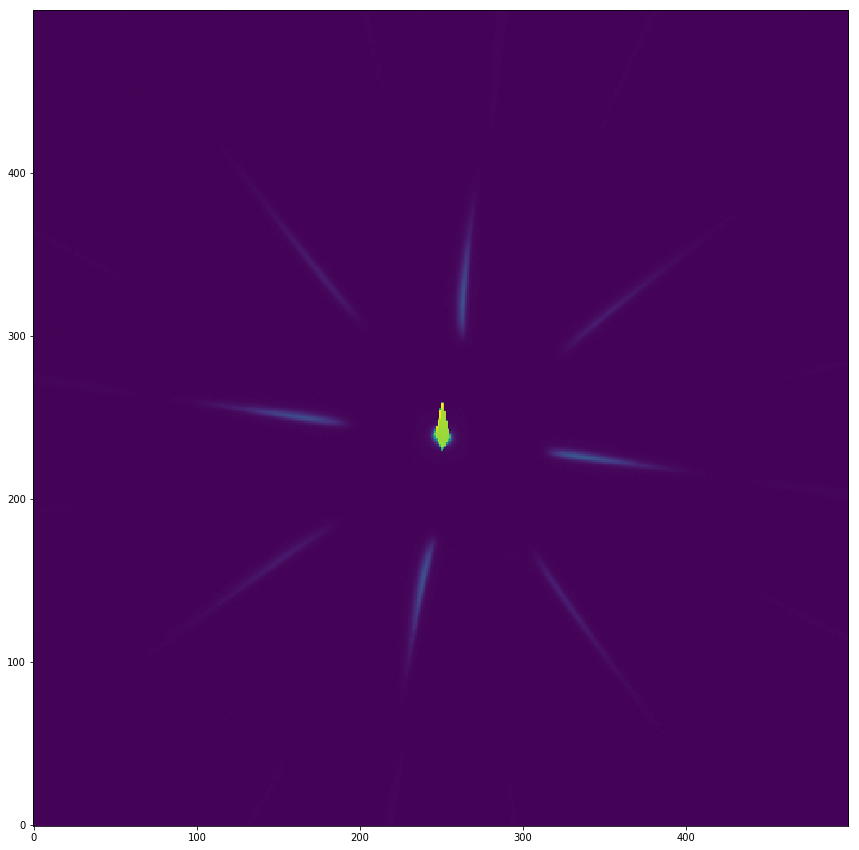

In [679]:
fig,ax = plt.subplots()

fig.set_size_inches(20, 15)
ax.imshow(imarray,origin='lower')
#ax.imshow(imarray)

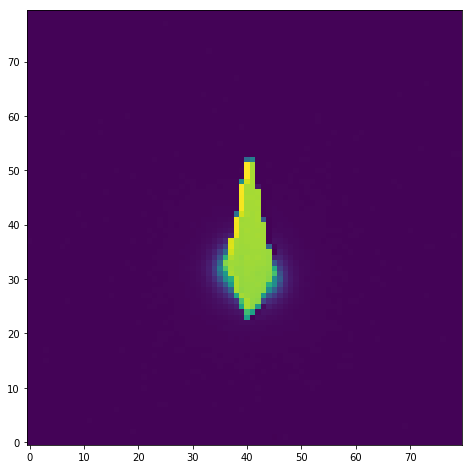

In [680]:
fig,ax = plt.subplots()

fig.set_size_inches(8, 8)
ax.imshow(stellarbox,origin='lower')

In [681]:
goffset_stellar_centroidx=raunche_params['goffset_stellar_centroidx']
goffset_stellar_centroidy=raunche_params['goffset_stellar_centroidy']

In [682]:
#print(xmean)

xsum=stellarbox.sum(axis=0)
ysum=stellarbox.sum(axis=1)

print('x direction')

data=xsum
y=(data-np.amin(data))/(np.amax(data)-np.amin(data))
x=np.arange(80)
H, A, x0, stddev = gauss_fit(goffset_stellar_centroidx,x, y)
print(H)
print(A)
print(x0)
print(stddev)
csx=A

print('y direction')

data=ysum
y=(data-np.amin(data))/(np.amax(data)-np.amin(data))
x=np.arange(80)
H, A, x0, stddev = gauss_fit(goffset_stellar_centroidy,x, y)
print(H)
print(A)
print(x0)
print(stddev)
csy=A

#csx=(np.argmax(xsum))
#csy=(np.argmax(ysum))

sx = cx-hafbox+csx
sy = cy-hafbox+csy

x direction
0.9748169355594303
40.345985637399465
2.2780906984190117
0.004541750135954205
y direction
0.9064790957476898
34.03292441881036
6.991443548808479
0.003487389839807508


In [683]:
print(sx)
print(sy)

250.9330889214723
241.77484937259015


### plot the centroid coordinates

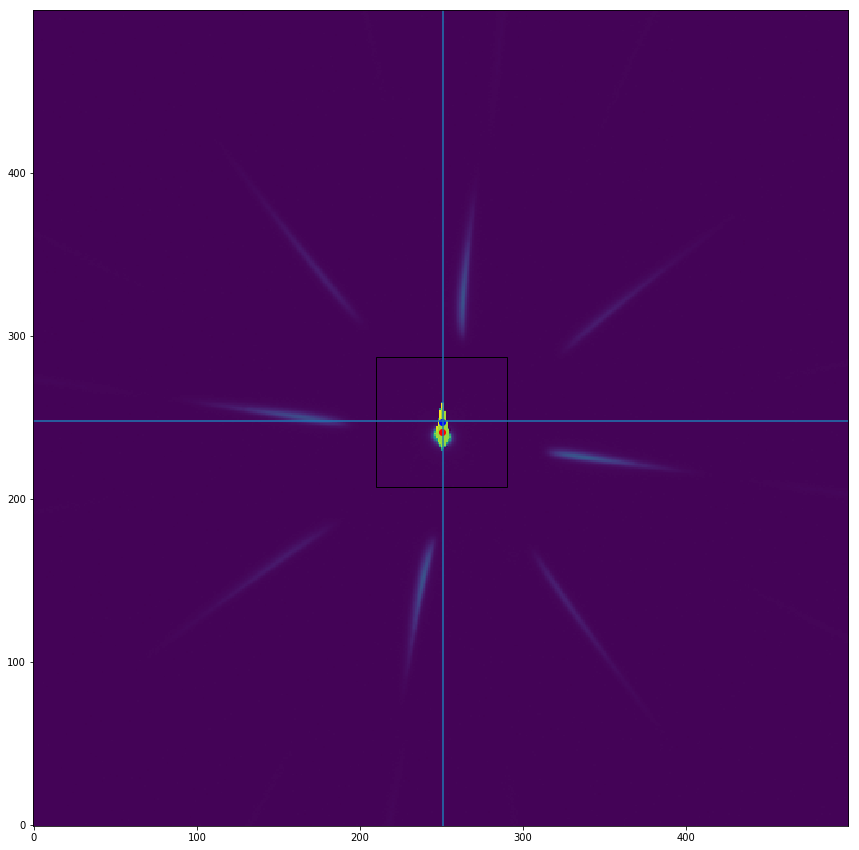

In [685]:
fig,ax = plt.subplots()

fig.set_size_inches(20, 15)
ax.imshow(imarray,origin='lower')


ax.plot(int(cx),int(cy), 'bo')

ax.plot(int(sx),int(sy), 'ro')

p = plt.Rectangle((int(cx)-hafbox, int(cy)-hafbox), 2*hafbox, 2*hafbox, fill=False)
#p = plt.Rectangle((200, 100), 2*hafbox, 2*hafbox, fill=False)
#p.set_transform(ax.transAxes)
#p.set_clip_on(False)
ax.add_patch(p)

#ax.plot(200,100,'bo')
ax.axvline(cx)
ax.axhline(cy)




### plot a 120x400 crop of the image

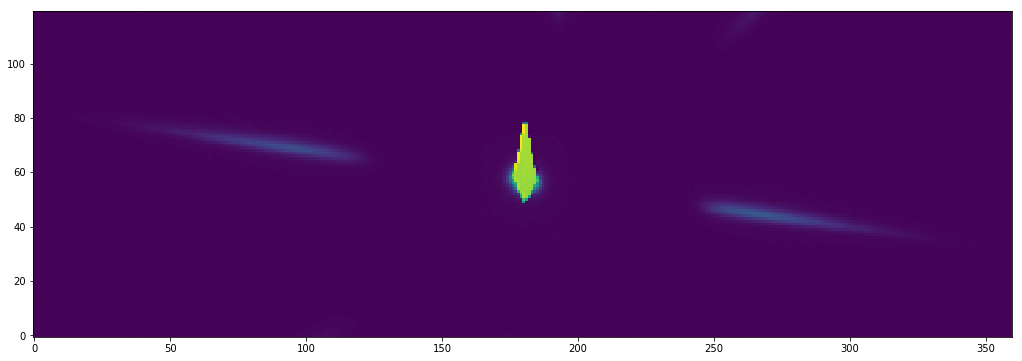

In [686]:
bds=60
bdl=180

subim=imarray[int(sy)-bds:int(sy)+bds,int(sx)-bdl:int(sx)+bdl]

fig,ax = plt.subplots()

fig.set_size_inches(18, 6)
#ax.imshow(subim,origin='lower',cmap='gray')

ax.imshow(subim,origin='lower')

#ax.plot(int(cy),int(cx), 'bo')

In [687]:
print(int(sy)-bds)
print(int(sy)+bds)
print(int(sx)-bdl)
print(int(sx)+bdl)

181
301
70
430


### populate an array max intensity values of each column

In [688]:
hormax=np.amax(subim,axis=0)

print(hormax)


[  581   555   566   571   542   545   561   545   553   541   564   560
   583   566   566   608   598   605   637   680   689   684   742   829
   874   954   890   941   963  1049  1078  1163  1325  1427  1517  1444
  1653  1707  1879  1868  1977  2040  2035  2133  2327  2438  2507  2548
  2572  2694  2807  3021  3274  3412  3380  3507  3683  3774  3648  3826
  4338  4645  4774  4994  5135  5511  5626  5911  5916  5943  6272  6558
  6914  7160  7247  7281  7211  7590  7947  8321  8498  8493  8448  8584
  8917  9273  9314  9670  9743  9526  9433  9626  9929 10168 10174 10066
  9936  9728  9659  9572  9831  9648  9449  8922  8456  8323  8246  8219
  7844  7577  6967  6569  6150  5718  5493  5133  4427  4108  3505  3178
  2744  2253  1860  1557  1226   957   803   677   596   582   567   569
   567   554   575   571   582   565   550   559   566   551   546   569
   583   562   561   572   545   568   601   565   549   574   566   595
   578   569   572   568   561   573   618   609   

### populate an array with the index of the column pixel intensity max

In [689]:
horargmax=np.argmax(subim,axis=0)

horargmax=horargmax.astype(float)

print(horargmax)

[ 83.  89.  28.  20.  71.  71.  69.  85. 101.  87.  81.  71.  86.  79.
  79.  81.  80.  80.  79.  80.  80.  80.  79.  79.  79.  79.  79.  78.
  78.  78.  78.  78.  78.  78.  78.  77.  77.  77.  77.  77.  77.  77.
  76.  76.  76.  76.  76.  76.  76.  75.  75.  75.  75.  75.  75.  75.
  74.  74.  74.  74.  74.  74.  74.  73.  73.  73.  73.  73.  73.  73.
  72.  72.  72.  72.  72.  72.  72.  71.  71.  71.  71.  71.  71.  71.
  70.  70.  70.  70.  70.  70.  69.  69.  69.  69.  69.  69.  69.  68.
  68.  68.  68.  68.  68.  68.  67.  67.  67.  67.  67.  67.  67.  67.
  66.  66.  66.  66.  66.  66.  66.  65.  65.  65.  65.  65.  65.  65.
  64.  65.  66. 108.  95.  67.  52.  24.  10.   3.   3.  21.  50.  60.
  63.  34.   8.  41.   1. 111.  62.  63.  62.  68.  66.  30.  77.   4.
  72.  53.  32.  43.  86.  28.  48.  53.  57.  44.  61.  59.  59.  57.
  58.  58.  58.  58.  58.  58.  58.  58.  59.  62.  67.  73.  77.  74.
  68.  65.  61.  57.  56.  56.  56.  56. 119. 119. 119. 119. 119. 119.
 119. 

In [690]:
cols=2*bdl
rows=2*bds

In [691]:
X = np.arange(cols)

In [692]:
pixcount_cutoff=raunche_params['pixcount_cutoff']

### NaN out the columns with no data

In [693]:
hornanargmax=np.copy(horargmax)
for i in X:
    if hormax[int(i)] < pixcount_cutoff:
        hornanargmax[int(i)]=np.nan

In [694]:
print(hornanargmax)

[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  80.  80.  80.  79.  79.  79.  79.  79.  78.
  78.  78.  78.  78.  78.  78.  78.  77.  77.  77.  77.  77.  77.  77.
  76.  76.  76.  76.  76.  76.  76.  75.  75.  75.  75.  75.  75.  75.
  74.  74.  74.  74.  74.  74.  74.  73.  73.  73.  73.  73.  73.  73.
  72.  72.  72.  72.  72.  72.  72.  71.  71.  71.  71.  71.  71.  71.
  70.  70.  70.  70.  70.  70.  69.  69.  69.  69.  69.  69.  69.  68.
  68.  68.  68.  68.  68.  68.  67.  67.  67.  67.  67.  67.  67.  67.
  66.  66.  66.  66.  66.  66.  66.  65.  65.  65.  65.  65.  65.  65.
  64.  65.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  59.  59.  57.
  58.  58.  58.  58.  58.  58.  58.  58.  59.  62.  67.  73.  77.  74.
  68.  65.  61.  57.  56.  56.  56.  56. 119. 119. 119. 119. 119. 119.
 119. 

## Plot the intensity max position of each column

Text(0.5,0,'Pixel Column')

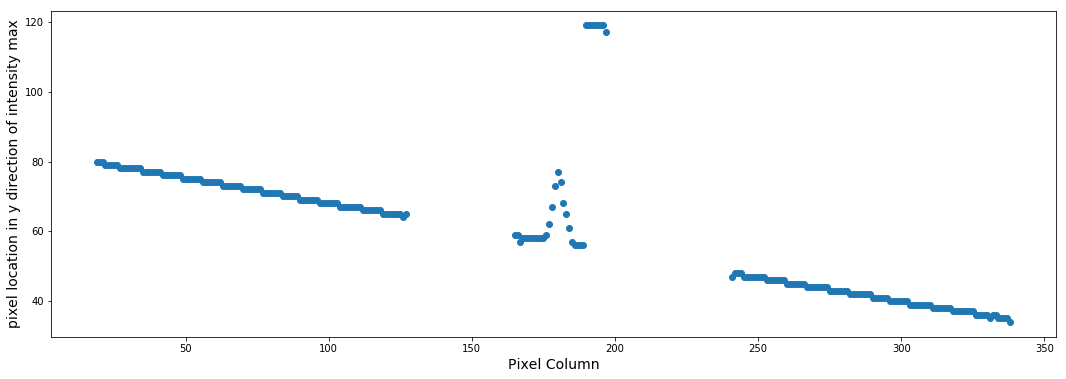

In [695]:
fig,ax = plt.subplots()

fig.set_size_inches(18, 6)

ax.scatter(X,hornanargmax)
ax.set_ylabel("pixel location in y direction of intensity max",size=14)
ax.set_xlabel("Pixel Column",size=14)
#plt.scatter(np.linspace(0,60,60),horargmax[60:120])

In [696]:
#code to see gaussian fit of one row

#data=subim[:,70]
#y=(data-np.amin(data))/(np.amax(data)-np.amin(data))
    
#x=np.arange(rows)
#plt.scatter(x,data)

In [698]:
print(raunche_params['polynom_h1'])
print(raunche_params['polynom_h1'])
print(raunche_params['h1r'])
print(raunche_params['h2r'])

1
1
(50, 100)
(250, 300)


In [699]:
polynom=1
polynom_h1=raunche_params['polynom_h1']
polynom_h2=raunche_params['polynom_h2']
polynom_v1=raunche_params['polynom_v1']
polynom_v2=raunche_params['polynom_v2']
#polynom=2

In [700]:
h1r=raunche_params['h1r']
h2r=raunche_params['h2r']

In [701]:

#h1r=(50,100)
#h2r=(270,330)

#h1r=(20,125)
#h2r=(250,330)



horwing1 = np.polyfit(X[h1r[0]:h1r[1]], horargmax[h1r[0]:h1r[1]], polynom)
print(horwing1)

horwing2 = np.polyfit(X[h2r[0]:h2r[1]], horargmax[h2r[0]:h2r[1]], polynom)
print(horwing2)

[-0.1465066 82.6547419]
[-0.13863145 81.51433373]


In [702]:
raunche_list['goffset_hwing1']=0.1
goffset_hwing1=raunche_params['goffset_hwing1']
goffset_hwing2=raunche_params['goffset_hwing2']

In [703]:
ghorwing1 = []

X1=range(h1r[0],h1r[1],1)

for i in X1:
    whichcol = i
    data=subim[:,whichcol]
    y=(data-np.amin(data))/(np.amax(data)-np.amin(data))
    
    x=np.arange(rows)
    
    H, A, x0, stddev = gauss_fit(goffset_hwing1,x, y)
    
    ghorwing1.append(A)
    
ghorwing1=np.array(ghorwing1)

ghorwing2 = []

X2=range(h2r[0],h2r[1],1)

for i in X2:
    whichcol = i
    data=subim[:,whichcol]
    y=(data-np.amin(data))/(np.amax(data)-np.amin(data))
    
    x=np.arange(rows)
    
    H, A, x0, stddev = gauss_fit(goffset_hwing2,x, y)
    
    ghorwing2.append(A)
    
ghorwing2=np.array(ghorwing2)



In [704]:
print(ghorwing1)
#ghorwing2.shape

[24.7353363  22.24518534 25.50704273 25.88577686 27.34407188 25.02115304
 23.27988726 23.01911188 23.95350615 25.31194157 25.93895081 25.36105839
 25.18270687 23.94937245 23.49279449 24.85172526 25.25256186 24.3493002
 24.07613114 24.27180164 23.34860362 24.16053937 23.64549937 24.59788741
 24.75141414 24.18765449 24.02826792 23.57556603 23.7130082  23.36531559
 23.95635856 23.69218615 23.53009637 23.54277299 24.19769564 23.53143455
 22.84755622 22.97444441 22.74470726 23.37842653 23.60143051 23.22559395
 23.48335753 23.03040366 22.73735001 22.93500832 23.05676642 23.30538813
 23.43879103 23.42820877]


In [705]:
gaushwing1 = np.polyfit(X1, ghorwing1, polynom_h1)
gh1 = np.poly1d(gaushwing1)
gaushwing2 = np.polyfit(X2, ghorwing2, polynom_h2)
gh2 = np.poly1d(gaushwing2)

Text(0.5,1,'slope of horizontal left order from ronchi grating')

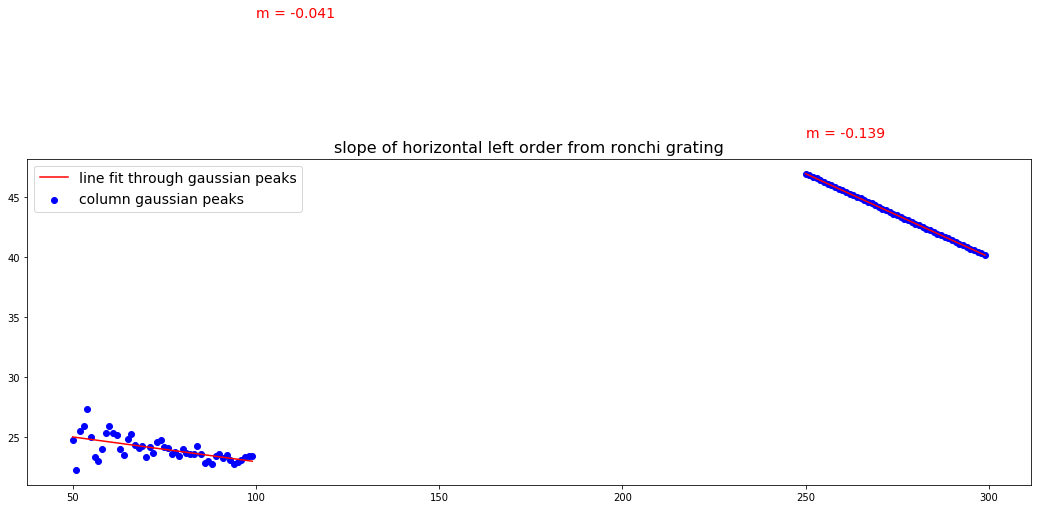

In [706]:
#m_hdiff=str(abs(round(gauswing2[0]-gauswing1[0],3)))

fig,ax = plt.subplots()

fig.set_size_inches(18, 6)

ax.scatter(X1,ghorwing1, label="column gaussian peaks", color = "blue")
ax.plot(X1,gh1(X1),color='red',label="line fit through gaussian peaks")
ax.scatter(X2,ghorwing2,color = "blue")
ax.plot(X2,gh2(X2),color='red',)
ax.text(100,60,'m = ' + str(round(gaushwing1[0],3)),fontsize=14,color='red')
ax.text(250,50,'m = ' + str(round(gaushwing2[0],3)),fontsize=14,color='red')
#ax.text(150,20,'diff between hor wings = ' + m_hdiff,fontsize=14,color='red')
ax.legend(fontsize=14)
ax.set_title("slope of horizontal left order from ronchi grating",fontsize=16)

## work in the vertical direction

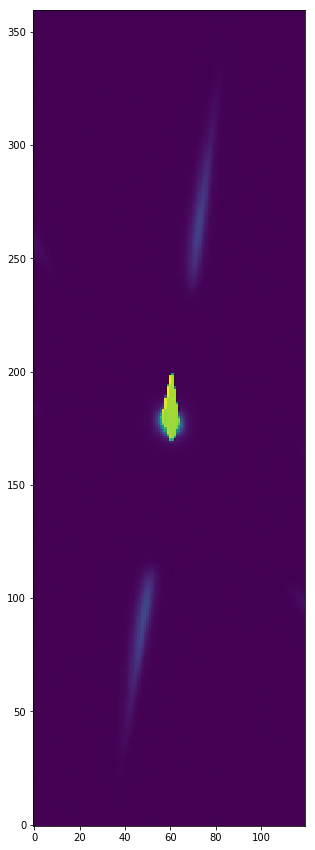

In [630]:
subvim=imarray[int(sy)-bdl:int(sy)+bdl,int(sx)-bds:int(sx)+bds]

fig,ax = plt.subplots()

fig.set_size_inches(20, 15)
#ax.imshow(subim,origin='lower',cmap='gray')

ax.imshow(subvim, origin='lower')

#ax.plot(int(cy),int(cx), 'bo')

In [631]:
vermax=np.amax(subvim,axis=1)

print(vermax)


[  567   555   569   566   582   556   561   574   569   573   574   570
   565   551   551   598   583   620   656   585   669   729   763   837
   890   843   827   840   955   881   967  1025  1202  1163  1429  1450
  1531  1610  1595  1651  1830  1884  2085  2044  2090  2174  2237  2433
  2490  2633  2724  2791  2892  3071  3309  3425  3402  3427  3418  3851
  4013  4422  4711  4873  4819  5032  5240  5668  5770  5869  6229  6457
  6565  6659  7105  7288  7429  7450  7417  7721  8162  8440  8632  8896
  8977  8842  8964  9229  9413  9624  9801  9813  9655  9804  9881  9626
  9418  9586  9060  8929  8659  8532  8188  7872  7494  6910  6428  6018
  5427  4953  4289  3542  2878  2379  1801  1405  1050   867   715   653
   606   591   577   595   573   591   579   564   585   565   572   572
   572   567   594   564   576   554   555   561   589   555   561   578
   576   596   563   568   565   610   563   576   558   570   598   581
   599   573   654   614   646   643   694   742   

### populate an array with the index of the column pixel intensity max

In [632]:
verargmax=np.argmax(subvim,axis=1)

verargmax=verargmax.astype(float)

print(verargmax)

[ 37.  96.  58. 117.  24. 110.  81.  69.  87.   9.  65.  36.  38.  95.
  35.  37.  36.  38.  37.  38.  38.  38.  38.  39.  38.  39.  39.  39.
  39.  39.  39.  39.  40.  39.  40.  40.  40.  40.  40.  41.  41.  41.
  41.  41.  41.  41.  42.  42.  42.  42.  42.  42.  42.  43.  43.  43.
  43.  43.  43.  43.  44.  44.  44.  44.  44.  44.  45.  45.  45.  45.
  45.  45.  45.  46.  46.  46.  46.  46.  46.  47.  47.  47.  47.  47.
  47.  47.  48.  48.  48.  48.  48.  48.  48.  49.  49.  49.  49.  49.
  49.  50.  50.  50.  50.  50.  50.  50.  51.  51.  51.  51.  51.  51.
  51.  52.  52.  51.  51.  51.  50.  52.  56.  53. 105.  54.  89.  15.
  35. 117.  47.  14.  20.  92.  19. 105. 105.  41.  72.  90.  16.  44.
 102.   9.  98.  19.  45.  87.  26.  42.  32. 102.  65.  94.  45.  84.
  64.  76.  68. 102.  53.  62.  59.  57.  59.  62.  60.  59.  60.  60.
  60.  60.  60.  60.  60.  59.  59.  59.  58.  61.  57.  57.  57.  57.
  57.  57.  58.  58.  58.  58.  58.  59.  59.  59.  59.  59.  60.  60.
  60. 

### NaN out the columns with no data

In [633]:
vernanargmax=np.copy(verargmax)
for i in X:
    if vermax[int(i)] < pixcount_cutoff:
        vernanargmax[int(i)]=np.nan

In [634]:
print(vernanargmax)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 37. nan 38. 38. 38. 39. 38. 39. 39. 39. 39. 39. 39. 39. 40. 39. 40. 40.
 40. 40. 40. 41. 41. 41. 41. 41. 41. 41. 42. 42. 42. 42. 42. 42. 42. 43.
 43. 43. 43. 43. 43. 43. 44. 44. 44. 44. 44. 44. 45. 45. 45. 45. 45. 45.
 45. 46. 46. 46. 46. 46. 46. 47. 47. 47. 47. 47. 47. 47. 48. 48. 48. 48.
 48. 48. 48. 49. 49. 49. 49. 49. 49. 50. 50. 50. 50. 50. 50. 50. 51. 51.
 51. 51. 51. 51. 51. 52. 52. 51. 51. 51. 50. 52. nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan 53. nan nan nan
 59. 62. 60. 59. 60. 60. 60. 60. 60. 60. 60. 59. 59. 59. 58. 61. 57. 57.
 57. 57. 57. 57. 58. 58. 58. 58. 58. 59. 59. 59. 59. 59. 60. 60. 60. 60.
 60. 61. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 69. 70.
 70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 71. 71

## Plot the intensity max position of each row

Text(0.5,0,'Pixel Column')

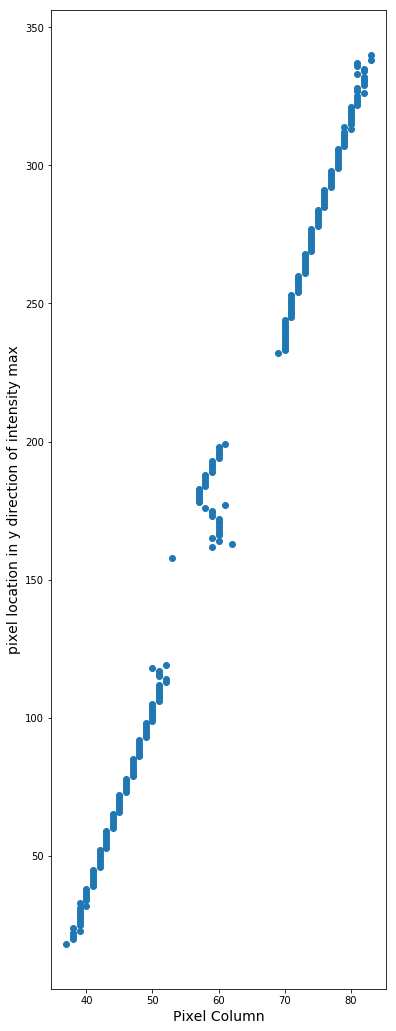

In [635]:
plt.figure(figsize=(6,18))
plt.scatter(vernanargmax,X)
plt.ylabel("pixel location in y direction of intensity max",size=14)
plt.xlabel("Pixel Column",size=14)
#plt.scatter(np.linspace(0,60,60),horargmax[60:120])



In [636]:
v1r=raunche_params['v1r']
v2r=raunche_params['v2r']

In [637]:
#v1r=(60,140)
#v1r=(30,90)
#v2r=(250,300)

#polynom=1


verwing1 = np.polyfit(X[v1r[0]:v1r[1]], verargmax[v1r[0]:v1r[1]], polynom)
print(verwing1)

verwing2 = np.polyfit(X[v2r[0]:v2r[1]], verargmax[v2r[0]:v2r[1]], polynom)
print(verwing2)

[ 0.14840727 34.78698456]
[ 0.12792079 39.28613861]


In [638]:
Y1=range(v1r[0],v1r[1],1)
print(Y1)

range(20, 105)


In [639]:
goffset_vwing1=raunche_params['goffset_vwing1']
goffset_vwing2=raunche_params['goffset_vwing2']

In [640]:
gverwing1 = []

Y1=range(v1r[0],v1r[1],1)

for i in Y1:
    whichcol = i
    data=subvim[whichcol,:]
    y=(data-np.amin(data))/(np.amax(data)-np.amin(data))
    
    x=np.arange(rows)
    
    H, A, x0, stddev = gauss_fit(goffset_vwing1,x, y)
    
    gverwing1.append(A)
    
gverwing1=np.array(gverwing1)

gverwing2 = []

Y2=range(v2r[0],v2r[1],1)

for i in Y2:
    whichcol = i
    data=subvim[whichcol,:]
    y=(data-np.amin(data))/(np.amax(data)-np.amin(data))
    
    x=np.arange(rows)
    
    H, A, x0, stddev = gauss_fit(goffset_vwing2,x, y)
    
    gverwing2.append(A)
    
gverwing2=np.array(gverwing2)



In [641]:
print(gverwing1)
#ghorwing2.shape

[38.10555902 37.82055749 38.02408164 38.37788706 38.06618082 38.29184138
 38.50191492 38.77513534 38.69822936 38.68710932 39.36011064 39.14256831
 39.40384426 39.47923417 39.69563401 39.85514573 39.9982893  40.13863401
 40.18820874 40.3123366  40.42914703 40.61726784 40.76519399 40.91913625
 40.97656154 41.15449007 41.30743764 41.45286093 41.64739426 41.76589326
 41.89492687 42.12520663 42.24624458 42.29453776 42.46551587 42.60415711
 42.75173447 42.93294683 43.06118708 43.25276855 43.4589129  43.5253644
 43.64431243 43.79007564 43.92875795 44.09856198 44.23497452 44.4181571
 44.5392778  44.69676877 44.85155817 44.99314622 45.14192937 45.2898231
 45.44719247 45.59046398 45.75102544 45.88747066 46.03934286 46.19373059
 46.35027635 46.50080419 46.65247607 46.81489166 46.97358824 47.07944062
 47.2578884  47.41821679 47.54079382 47.73141777 47.8805684  48.02990558
 48.19482641 48.35587316 48.50126666 48.67715209 48.82746124 48.98437488
 49.13943822 49.30784382 49.45132006 49.60904699 49.79

In [642]:
#polynom_v1=1
#polynom_v2=1

In [643]:
gausvwing1 = np.polyfit(Y1, gverwing1, polynom_v1)
gv1 = np.poly1d(gausvwing1)
gausvwing2 = np.polyfit(Y2, gverwing2, polynom_v2)
gv2 = np.poly1d(gausvwing2)

Text(0.5,1,'slope of horizontal left order from ronchi grating')

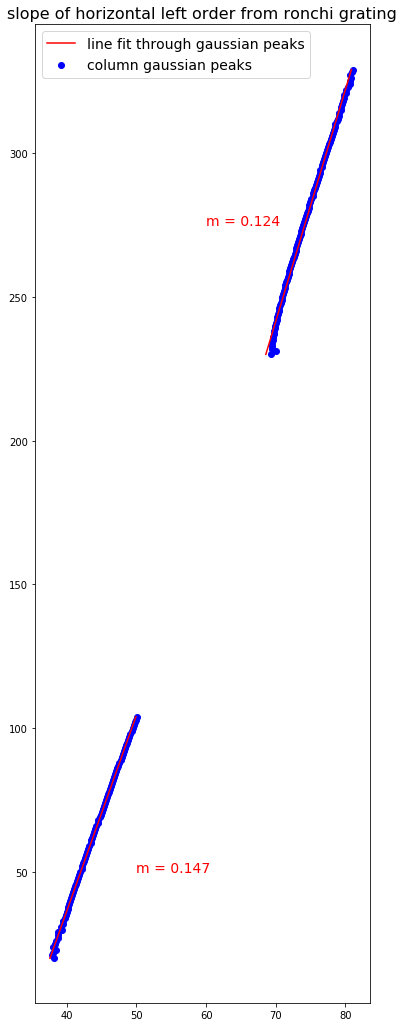

In [644]:
m_hdiff=str(abs(round(gausvwing2[0]-gausvwing1[0],3)))

fig,ax = plt.subplots()

fig.set_size_inches(6, 18)

ax.scatter(gverwing1, Y1, label="column gaussian peaks", color = "blue")
ax.plot(gv1(Y1),Y1,color='red',label="line fit through gaussian peaks")
ax.scatter(gverwing2, Y2, color = "blue")
ax.plot(gv2(Y2),Y2,color='red')
ax.text(50,50,'m = ' + str(round(gausvwing1[0],3)),fontsize=14,color='red')
ax.text(60,275,'m = ' + str(round(gausvwing2[0],3)),fontsize=14,color='red')
#ax.text(150,20,'diff between hor wings = ' + m_hdiff,fontsize=14,color='red')
ax.legend(fontsize=14)
ax.set_title("slope of horizontal left order from ronchi grating",fontsize=16) 


### Increase contrast

In [645]:
imarray3=np.cbrt(imarray)/(np.max(imarray))

### Solver

In [646]:
#Ah = np.array([[ -gaushwing1[0],1], [-gaushwing2[0],1] ])
#bh = np.array([gaushwing1[1],gaushwing2[1]])
#zh = np.linalg.solve(Ah,bh)
#print(zh)

#Av = np.array([[1, -gausvwing1[0]], [1,-gausvwing2[0]] ])
#bv = np.array([gausvwing1[1],gausvwing2[1]])
#zv = np.linalg.solve(Av,bv)
#print(zv)

#horsecx=zh[0]+int(sx)-bdl
#horsecy=zh[1]+int(sy)-bds

#versecx=zv[0]+int(sx)-bds
#versecy=zv[1]+int(sy)-bdl

In [647]:
#print(horsecx)
#print(horsecy)

#print(versecx)
#print(versecy)

-9407.941972387907
195.59213022897583
259.4319476847103
307.80030600085007


In [648]:
hdr=im[0].header
#im[0].header
#hdr['ADC1']

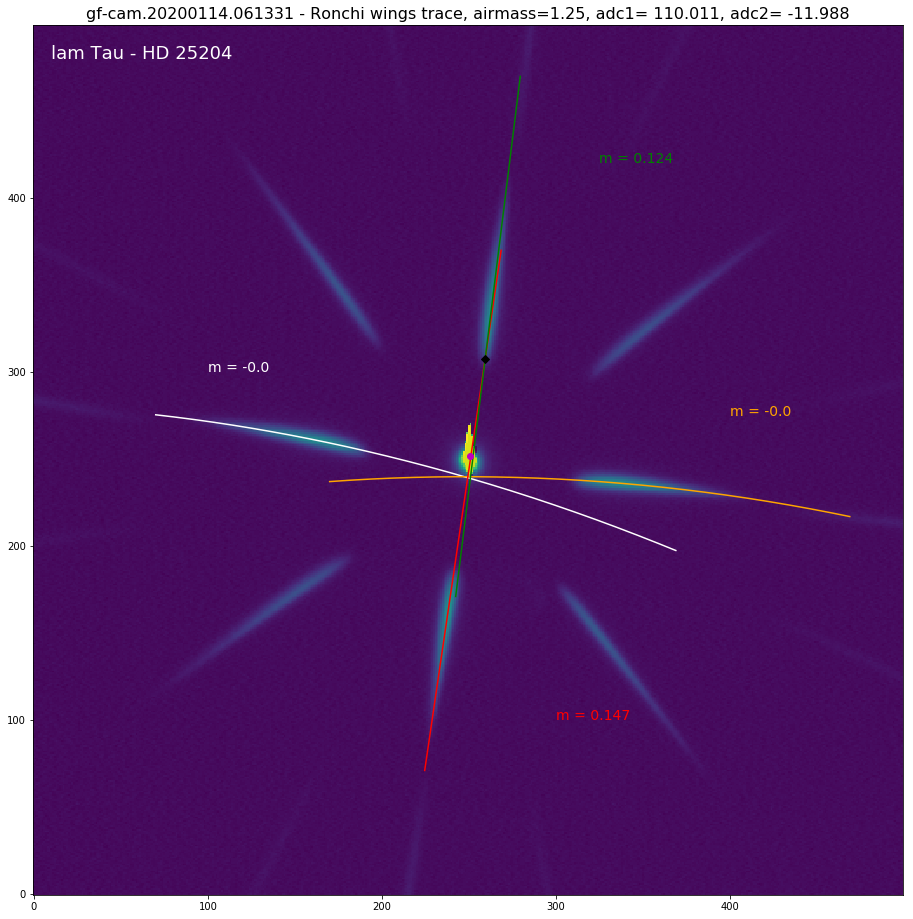

In [657]:
ff=np.arange(0,300,1)
ff2=np.arange(100,400,1)
ff3=np.arange(0,300,1)
ff4=np.arange(100,400,1)

fig,ax = plt.subplots()

fig.set_size_inches(16, 16)
ax.imshow(imarray3,origin='lower')
#ax.imshow(imarray)

ax.plot(ff+int(sx)-bdl,gh1(ff)+int(sy)-bds,color='white')
ax.text(100,300,'m = ' + str(round(gaushwing1[0],3)),fontsize=14,color='white')
ax.plot(ff2+int(sx)-bdl,gh2(ff2)+int(sy)-bds,color='orange')
ax.text(400,275,'m = ' + str(round(gaushwing2[0],3)),fontsize=14,color='orange')
ax.plot(gv1(ff3)+int(sx)-bds,ff3+int(sy)-bdl,color='red')
ax.text(300,100,'m = ' + str(round(gausvwing1[0],3)),fontsize=14,color='red')
ax.plot(gv2(ff4)+int(sx)-bds,ff4+int(sy)-bdl,color='green')
ax.text(325,420,'m = ' + str(round(gausvwing2[0],3)),fontsize=14,color='green')
ax.set_title(filename + " - Ronchi wings trace, airmass=" + raunche_params['airmass'] + ", adc1= " + hdr['ADC1'] + ", adc2= " + hdr['ADC2'] ,fontsize=16)
ax.plot(sx,sy,'mo')
ax.text(10,480,raunche_params['target_name'],fontsize=18,color='white')

#if 0 < horsecx < 500 and 0 < horsecy < 500:
#    ax.plot(horsecx,horsecy,'cD')
#if 0 < versecx < 500 and 0 < versecx < 500:
#    ax.plot(versecx,versecy,'kD')


fig.savefig(filename + 'ronchi-wing-trace.png')

In [658]:
last_processed = datetime.datetime.now()


fields=[event_timestamp,round(sx,2),round(sy,2),round(gaushwing1[0],3),
        round(gaushwing2[0],3),round(gausvwing1[0],3),round(gausvwing2[0],3),
        #round(horsecx,2),round(horsecy,2),round(versecx,2),round(versecy,2),
        hdr['ADC1'],hdr['ADC2'],raunche_params['timestamp'],raunche_params['target_name'],last_processed]
with open(r'raunche_single.csv', 'a',newline='\n') as f:
    writer = csv.writer(f)
    writer.writerow(fields)